In [344]:
%load_ext autoreload
%autoreload 2

from volume_fish import VolumeFish
from utils import *
from mesm import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Change the exp_folder to the path of the experiment

In [388]:
exp_folder = r'C:\Users\minel\Documents\data\elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405'

In [389]:
#Create fish

fish = VolumeFish(exp_folder)
fish.data_paths

Batch exists. Loading batch.pickle


{'injection': WindowsPath('C:/Users/minel/Documents/data/elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405/injection.txt'),
 'log': WindowsPath('C:/Users/minel/Documents/data/elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405/log.549.txt'),
 'postgavage_path': WindowsPath('C:/Users/minel/Documents/data/elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405/postgavage_vagal_R'),
 'cropped': WindowsPath('C:/Users/minel/Documents/data/elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405/postgavage_vagal_R/img_cropped.tif'),
 'mesmerize': WindowsPath('C:/Users/minel/Documents/data/elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405/postgavage_vagal_R/mesmerize-batch'),
 'opts': WindowsPath('C:/Users/minel/Documents/data/elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405/postgavage_vagal_R/opts.pkl'),
 'raw_image': WindowsPath('C:/Users/minel/Documents/data/elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405/postgavage_vagal_R/postgavage_vagal_R.ch1.tif'),
 'frametimes': WindowsPath('C:/Use

## Detrend dF/F

In [390]:
df = compute_dff(fish)
df

C:\Users\minel\caImageAnalysis\gavage\utils.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_df['dff'][i] = dffs
C:\Users\minel\caImageAnalysis\gavage\utils.py:243: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['temporal', 'roi_indices', 'dff'], dtype='object')]

  temporal_df.to_hdf(fish.data_paths['postgavage_path'].joinpath('temporal.h5'), key='temporal')


,plane,temporal,roi_indices,inj_frame,dff
0,0,"[[8.146308184673625, 8.146308184673625, 8.1463...","[33, 39, 40, 43, 44, 45, 51, 52]",144,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,"[[-48.167494103579195, -2.224800267588152, -5....","[27, 28, 40, 46, 47, 48, 52]",144,"[[-1.9052082526072398, -1.0418105114269156, -1..."
2,2,"[[-69.21462929470887, -69.21462929470887, -69....","[30, 32, 33, 34, 38, 43]",144,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,"[[-292.0032682717076, -292.0032682717076, -292...","[27, 28, 30, 31, 35]",144,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4,"[[-37.71148476348711, -37.71148476348711, -37....","[19, 20, 25]",144,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


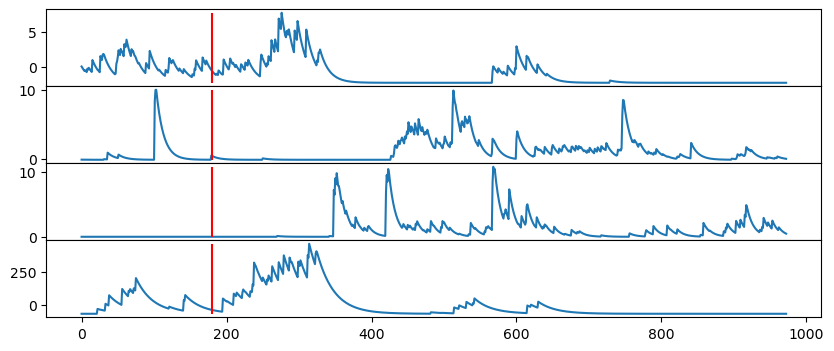

In [317]:
# Plot the individual dF/F components per plane

plane = 0

plot_temporal(fish, plane, heatmap=False, key='dff')

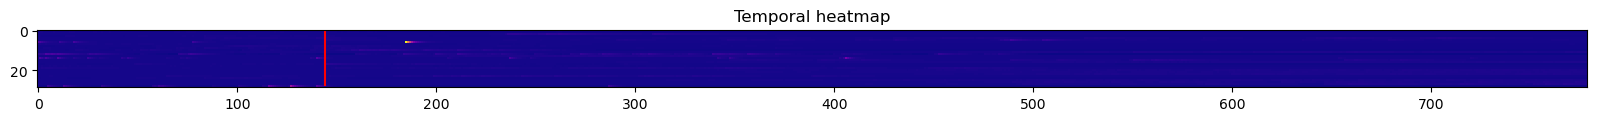

In [391]:
vol_df = plot_temporal_volume(fish, heatmap=True, key='dff')

### Normalize between 0 and 1

In [392]:
norm_df = normalize_dff(fish)
norm_df

C:\Users\minel\caImageAnalysis\gavage\utils.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_df['norm_dff'][i] = norm_dffs
C:\Users\minel\caImageAnalysis\gavage\utils.py:262: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['temporal', 'roi_indices', 'dff', 'norm_dff'], dtype='object')]

  temporal_df.to_hdf(fish.data_paths['postgavage_path'].joinpath('temporal.h5'), key='temporal')


,plane,temporal,roi_indices,inj_frame,dff,norm_dff
0,0,"[[8.146308184673625, 8.146308184673625, 8.1463...","[33, 39, 40, 43, 44, 45, 51, 52]",144,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,"[[-48.167494103579195, -2.224800267588152, -5....","[27, 28, 40, 46, 47, 48, 52]",144,"[[-1.9052082526072398, -1.0418105114269156, -1...","[[0.0, 0.12346172834029427, 0.1155842733972510..."
2,2,"[[-69.21462929470887, -69.21462929470887, -69....","[30, 32, 33, 34, 38, 43]",144,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,"[[-292.0032682717076, -292.0032682717076, -292...","[27, 28, 30, 31, 35]",144,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4,"[[-37.71148476348711, -37.71148476348711, -37....","[19, 20, 25]",144,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


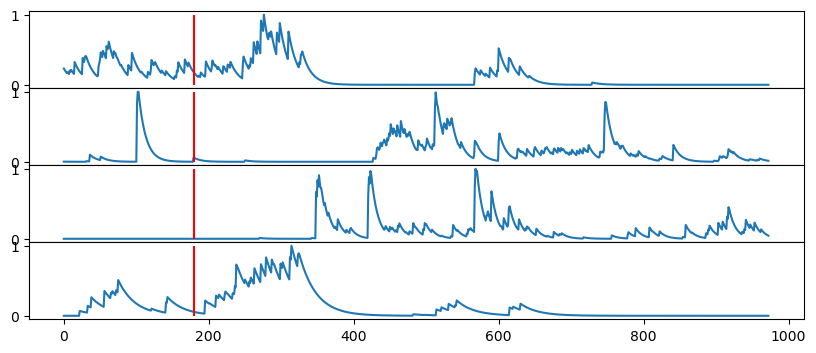

In [320]:
# Plot the individual normalized dF/F components per plane

plane = 0

plot_temporal(fish, plane, heatmap=False, key='norm_dff')

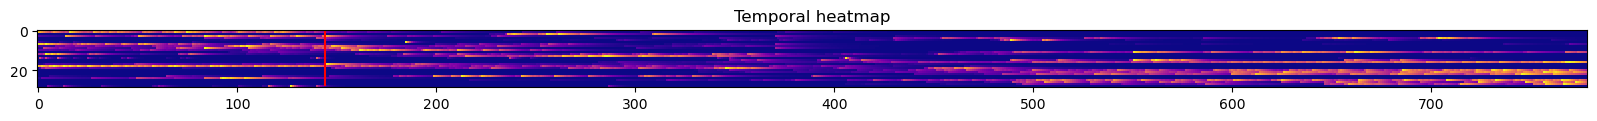

In [393]:
norm_vol_df = plot_temporal_volume(fish, heatmap=True, key='norm_dff')

## Cluster temporal responses

In [736]:
norm_vol_df.shape

(305, 399)

In [394]:
# Hierarchical clustering of temporal responses

import scipy.cluster.hierarchy as sch

d = sch.distance.pdist(norm_vol_df)
Z = sch.linkage(d, method='complete')

In [395]:
# Flat clustering of the dendrogram

t = 9 # max inter-cluster distance allowed
T = sch.fcluster(Z, t, criterion='distance', depth=3)

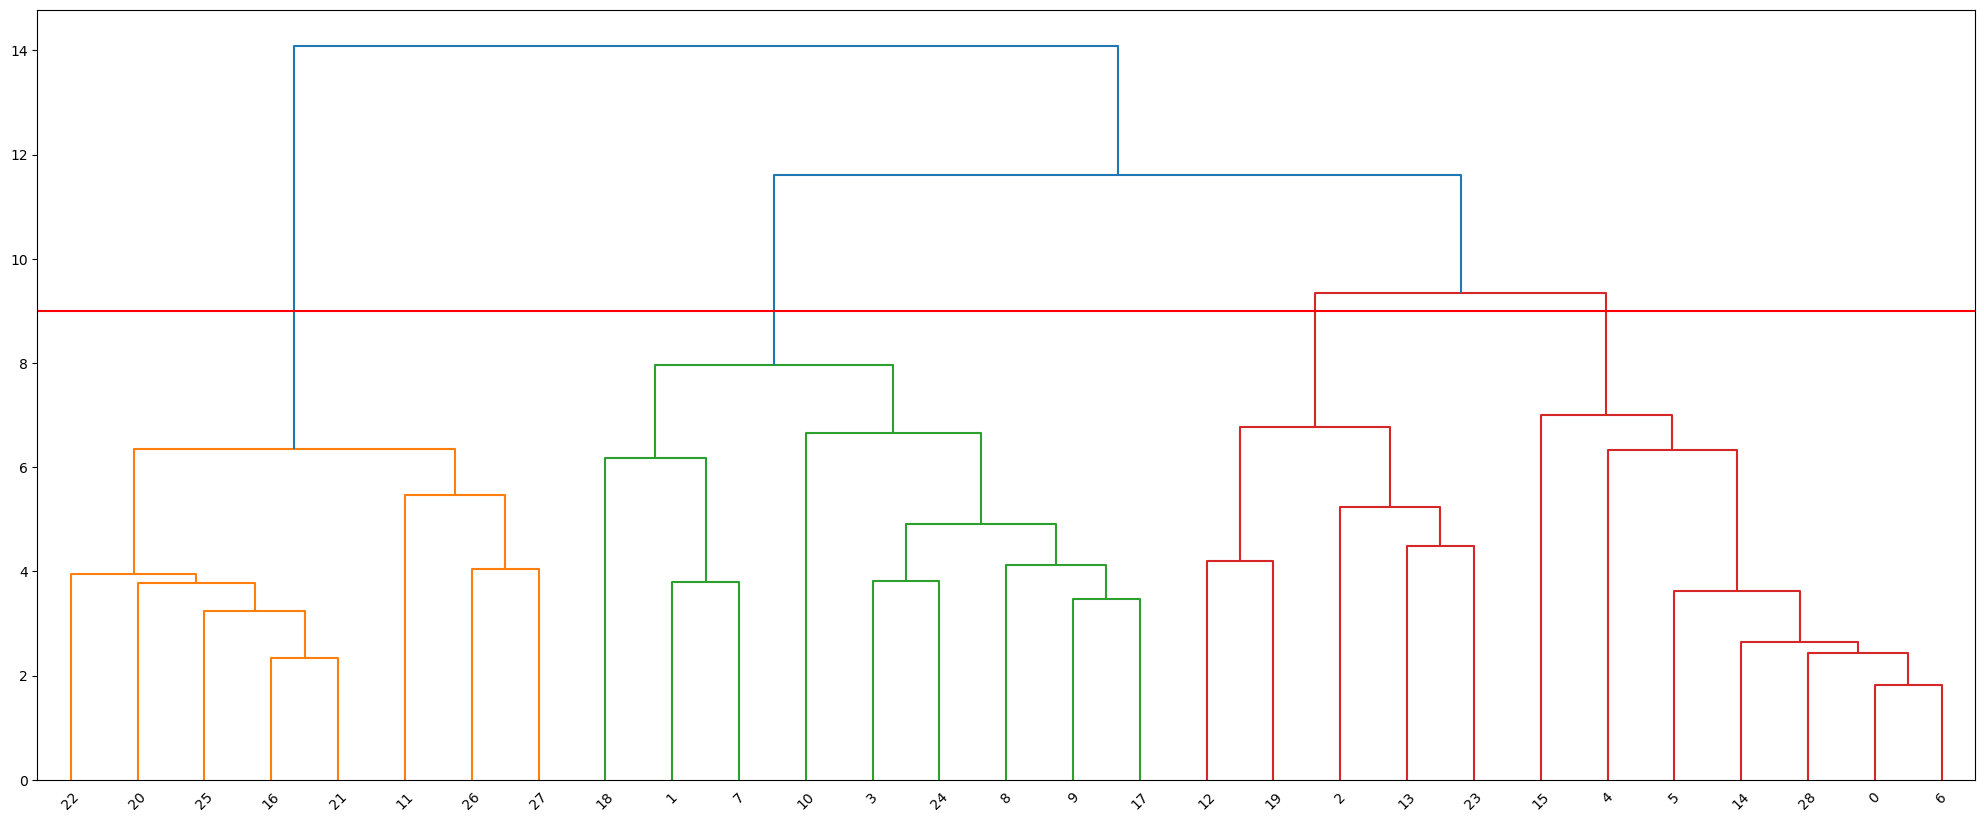

In [396]:
fig = plt.figure(figsize=(25, 10))
dn = sch.dendrogram(Z)
plt.hlines(t, 0, len(d), color='r')

plt.savefig(fish.data_paths['postgavage_path'].joinpath("hierarchical_clustering.pdf"), transparent=True)

In [397]:
sort = np.argsort(T)
T[sort]

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4], dtype=int32)

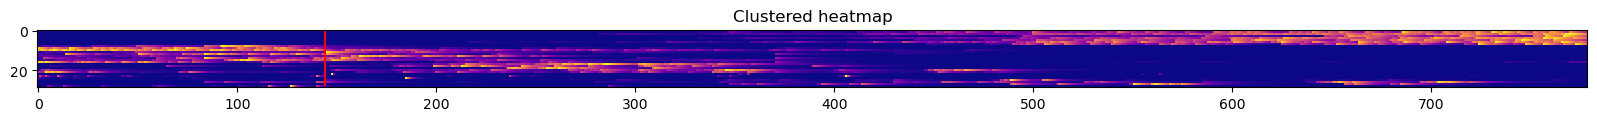

In [398]:
# Heatmap sorted by cluster number

fig = plt.figure(figsize=(20, 20))
plt.imshow(norm_vol_df[sort], cmap='plasma', interpolation='nearest')
plt.vlines(min(norm_df.inj_frame), 0, len(norm_vol_df)-1, color='r')
plt.title(f'Clustered heatmap')
plt.show()

In [399]:
# Create a clusters dict to store all temporal responses per cluster

clusters = {}

for i, cluster in enumerate(T[sort]):
    if cluster in clusters:
        clusters[cluster].append(norm_vol_df[sort][i])
    else:
        clusters[cluster] = [norm_vol_df[sort][i]]
        
sorted_keys = sorted(clusters, key=lambda k: len(clusters[k]), reverse=True)
sorted_clusters = {key: clusters[key] for key in sorted_keys}

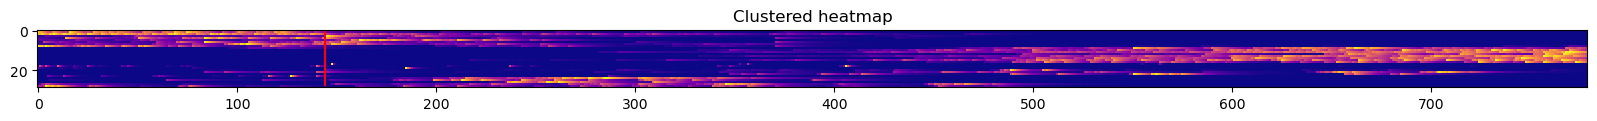

In [400]:
# Cluster heatmap sorted by the number of neurons that belongs to it

fig = plt.figure(figsize=(20, 20))
plt.imshow(sum(sorted_clusters.values(), []), cmap='plasma', interpolation='nearest')
plt.vlines(min(norm_df.inj_frame), 0, len(norm_vol_df)-1, color='r')
plt.title(f'Clustered heatmap')
plt.show()

In [401]:
# Create a dictionary that holds the median index of maximum peak indices

max_inds = dict()
for cl in clusters:
    inds = []
    for t in clusters[cl]:
        i = np.argmax(t)
        inds.append(i)
    max_inds[cl] = np.median(inds)
    
sorted_keys = sorted(max_inds, key=lambda k: max_inds[k])
sorted_clusters = {key: clusters[key] for key in sorted_keys}

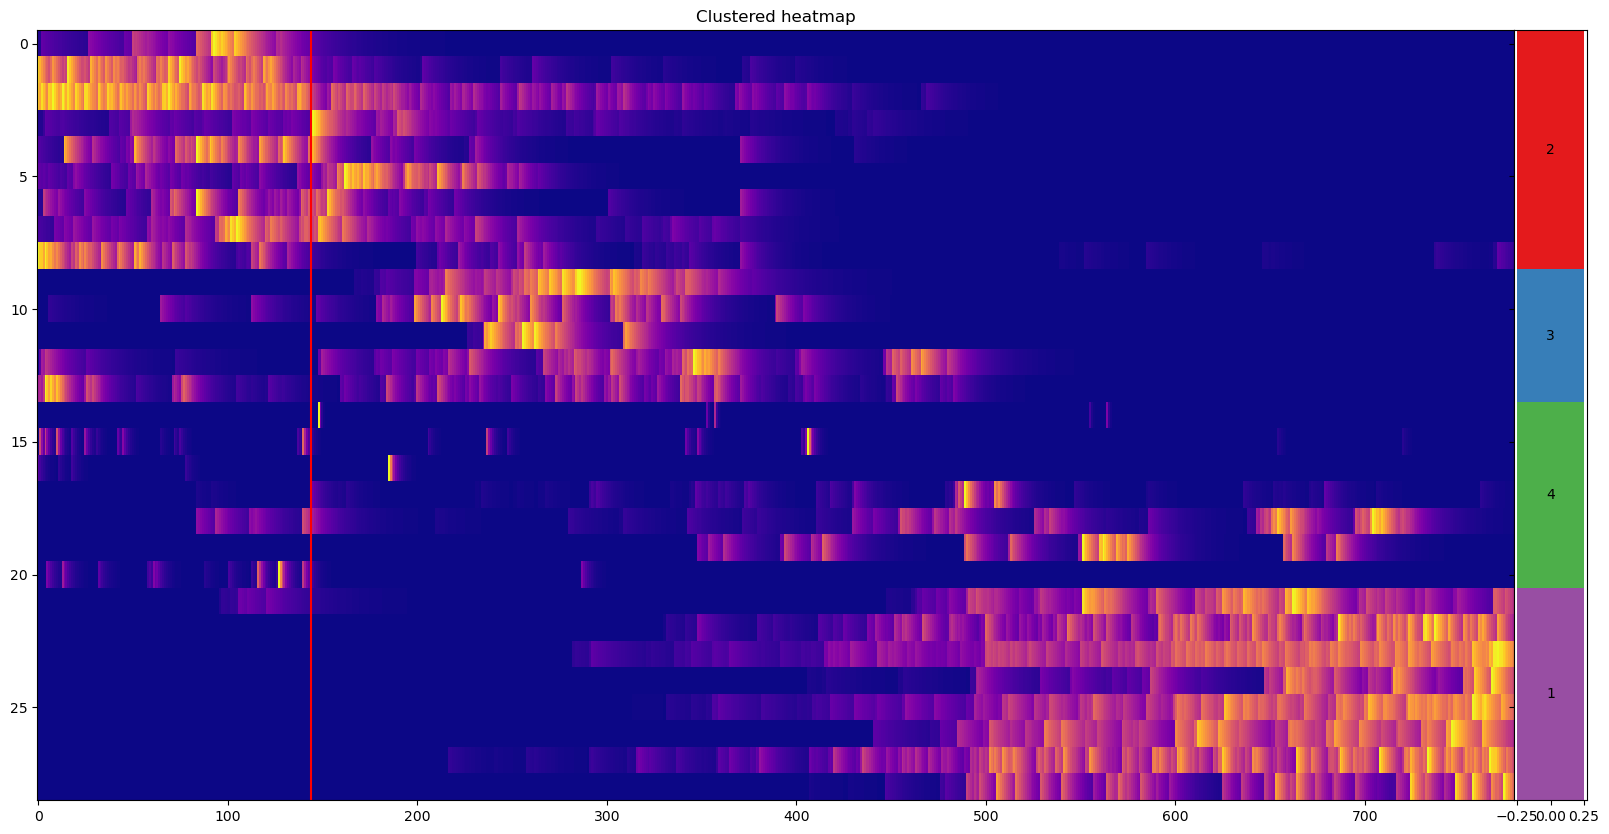

In [402]:
# Cluster heatmap sorted by the average peak response of clusters
from matplotlib.cm import get_cmap

temp_list = sum(sorted_clusters.values(), [])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, width_ratios=[20, 1], height_ratios=[1], figsize=(20, 10))
ax1.imshow(temp_list, cmap='plasma', interpolation='nearest', aspect='auto')
ax1.vlines(min(norm_df.inj_frame), -0.5, len(norm_vol_df)-0.5, color='r')
ax1.title.set_text('Clustered heatmap')

bottom = -0.5  # y-coordinates of the bottom side of the bar
x = 0
width = 0.5

cmap = get_cmap('Set1')  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list
ax2.set_prop_cycle(color=colors)

for cluster, temps in sorted_clusters.items():
    p = ax2.bar(x, len(temps), width, label=str(cluster), bottom=bottom)
    bottom += len(temps)
    
    ax2.bar_label(p, labels=[str(cluster)], label_type='center')

plt.subplots_adjust(wspace=0)
# plt.savefig(fish.data_paths['postgavage_path'].joinpath("heatmap_clusters.pdf"), transparent=True)

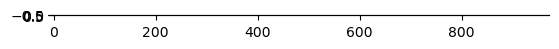

In [332]:
vals = sorted_clusters[4]
sorted_vals = sorted(vals, key=np.argmax)
plt.imshow(sorted_vals, cmap='plasma', interpolation='nearest')

In [337]:
len(temp_list)

30

In [338]:
len(sorted_clusters[2])

10

In [335]:
min(norm_df.inj_frame)

180

In [343]:
calculate_fps(fish.data_paths['volumes']['0']['frametimes'])

0.9966540898412473

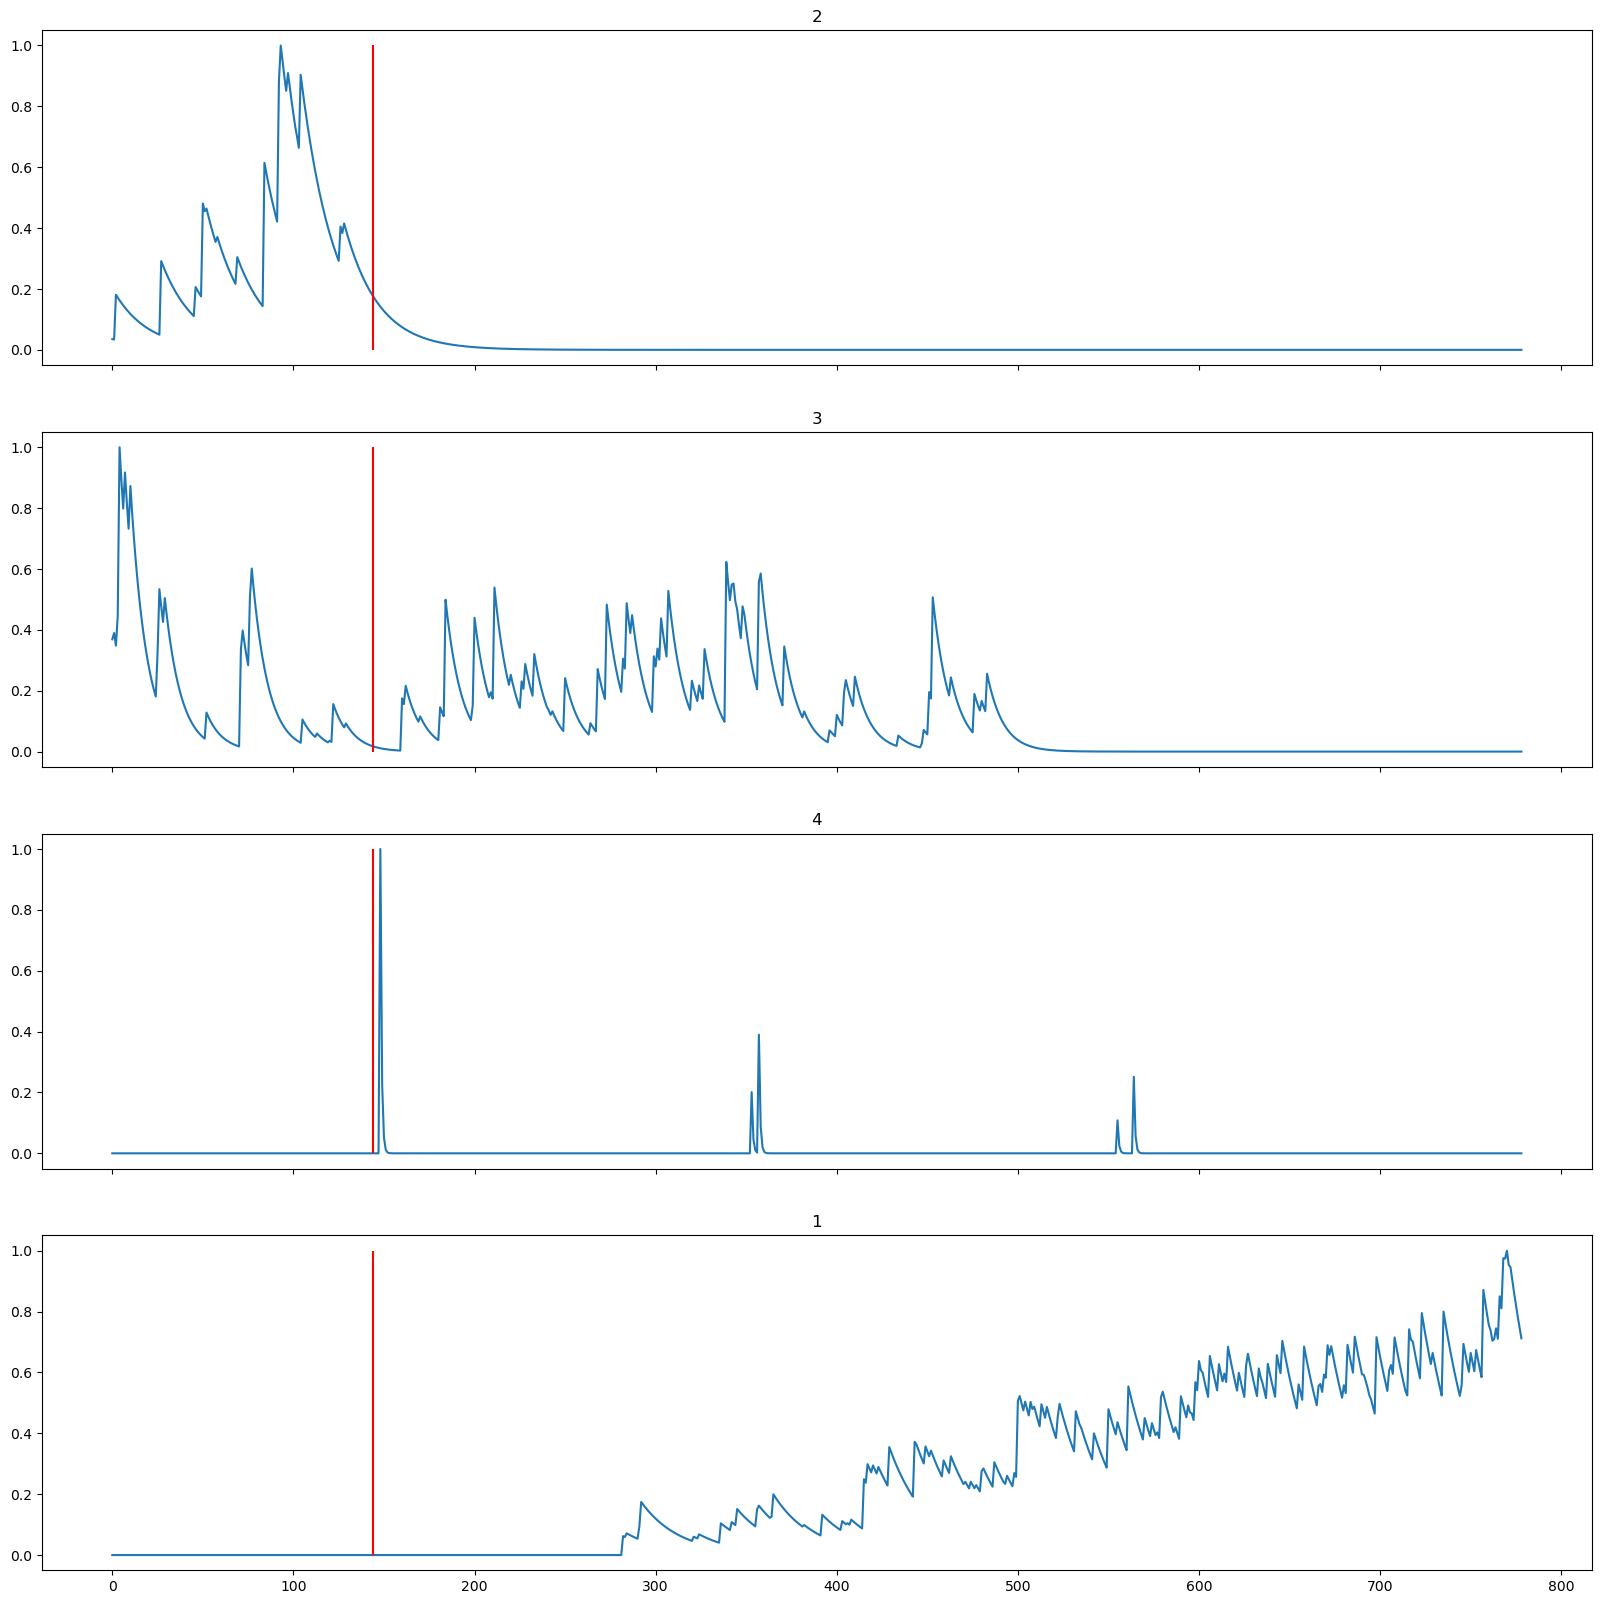

In [403]:
# Representative traces from each cluster

import random

fig, axes = plt.subplots(len(sorted_clusters), 1, sharex=True, sharey=True, figsize=(20, 20))

for i, (cluster, temp) in enumerate(sorted_clusters.items()):
    t = random.choice(temp)
    axes[i].plot(t)
    axes[i].title.set_text(cluster)
    axes[i].vlines(min(norm_df.inj_frame), 0, 1, color='r')
    
plt.savefig(fish.data_paths['postgavage_path'].joinpath("cluster_representative_traces.pdf"), transparent=True)

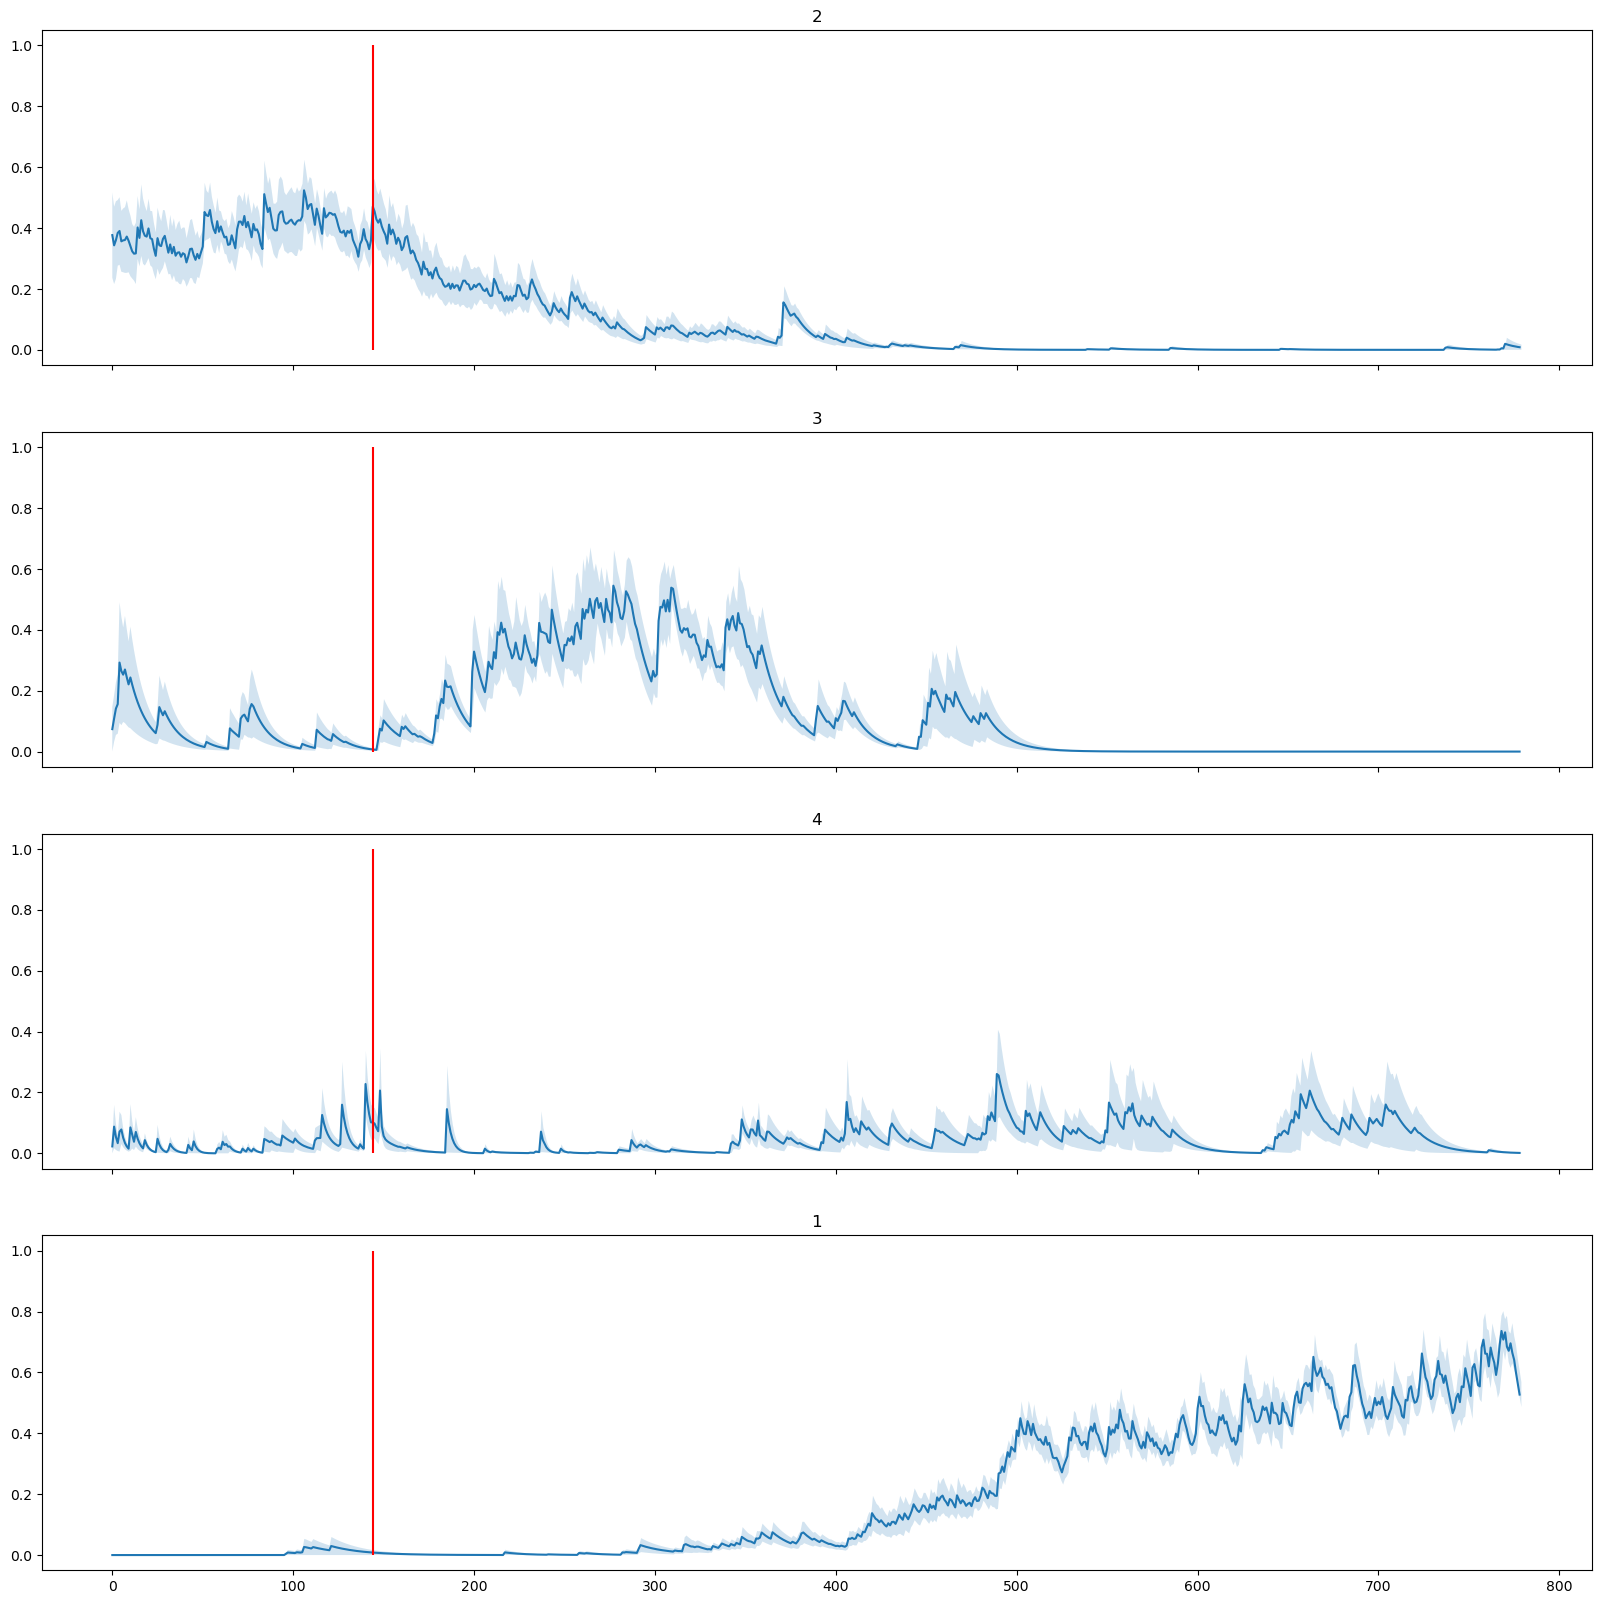

In [404]:
# Average traces for each cluster

from scipy.stats import sem

fig, axes = plt.subplots(len(sorted_clusters), 1, sharex=True, sharey=True, figsize=(20, 20))

for i, (cluster, temp) in enumerate(sorted_clusters.items()):
    t = np.mean(temp, axis=0)
    err = sem(temp)
    x = np.linspace(0, len(t), len(t))
    axes[i].plot(t)
    axes[i].fill_between(x, t-err, t+err, alpha=0.2)
    axes[i].title.set_text(cluster)
    axes[i].vlines(min(norm_df.inj_frame), 0, 1, color='r')

plt.savefig(fish.data_paths['postgavage_path'].joinpath("cluster_average_traces.pdf"), transparent=True)

In [405]:
# Visualize all the planes for spatial representation

mes_df = uuid_to_plane(load_mesmerize(fish))
iw = visualize_mesmerize(mes_df, 'mcorr')
iw.show()

Batch exists. Loading batch.pickle
Decode mmap filename C:\Users\minel\Documents\data\elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405\postgavage_vagal_R\mesmerize-batch\12991aac-b23d-47d5-bcc1-19f4fb9ef26d\12991aac-b23d-47d5-bcc1-19f4fb9ef26d-image_els__d1_400_d2_400_d3_1_order_F_frames_780.mmap
Decode mmap filename C:\Users\minel\Documents\data\elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405\postgavage_vagal_R\mesmerize-batch\28797fdd-3ef5-4682-84b2-138ee9252385\28797fdd-3ef5-4682-84b2-138ee9252385-image_els__d1_400_d2_400_d3_1_order_F_frames_780.mmap
Decode mmap filename C:\Users\minel\Documents\data\elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405\postgavage_vagal_R\mesmerize-batch\7861b5b1-0c09-47f8-beb6-678af2d43acc\7861b5b1-0c09-47f8-beb6-678af2d43acc-image_els__d1_400_d2_400_d3_1_order_F_frames_780.mmap
Decode mmap filename C:\Users\minel\Documents\data\elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405\postgavage_vagal_R\mesmerize-batch\b14d1f71-c211-4158-a1cf-85946

RFBOutputContext()

In [406]:
iw.plot.canvas.close()

In [407]:
# Organize centers of mass into clusters for spatial representation

all_coms = []

for i, row in norm_df.iterrows():
    plane = f'img_stack_{row.plane}'
    mes_row = mes_df[(mes_df.algo == 'cnmf') & (mes_df.item_name == plane)].iloc[0]
    _, coms = mes_row.cnmf.get_contours('good', swap_dim=False)  
    coms = np.array(coms)
    coms = coms[row.roi_indices]
    all_coms.append(coms)
     
all_coms = np.concatenate(all_coms)

com_clusters = {}

for i, cluster in enumerate(T[sort]):
    if cluster in com_clusters:
        com_clusters[cluster].append(all_coms[sort][i])
    else:
        com_clusters[cluster] = [all_coms[sort][i]]

sorted_com_clusters = {key: com_clusters[key] for key in sorted_keys}
sorted_com_clusters

{2: [array([179.65743343, 198.56342606]),
  array([ 72.48936734, 181.05101105]),
  array([ 63.15910984, 190.44478909]),
  array([ 78.63704318, 190.06810329]),
  array([ 40.39892444, 212.95614033]),
  array([ 65.41648944, 178.54150448]),
  array([ 48.00504629, 168.0662907 ]),
  array([ 69.36466444, 136.88772944]),
  array([ 58.36118851, 241.83802043])],
 3: [array([194.3122381 , 220.42803567]),
  array([113.3782156 , 193.75012255]),
  array([115.66968775, 199.8099511 ]),
  array([ 85.83189723, 230.73046928]),
  array([ 83.99423279, 235.01687633])],
 4: [array([126.74400241, 140.6588847 ]),
  array([ 85.92833787, 242.58393466]),
  array([ 38.19795127, 240.47437742]),
  array([ 87.2741809 , 219.12027666]),
  array([ 46.79652041, 227.05130394]),
  array([ 41.43097087, 173.84394682]),
  array([207.12588411, 204.42435414])],
 1: [array([ 52.9036898 , 219.52728974]),
  array([ 74.61345737, 243.58204747]),
  array([ 54.26869947, 194.69840541]),
  array([130.58414783, 192.00667643]),
  array([ 

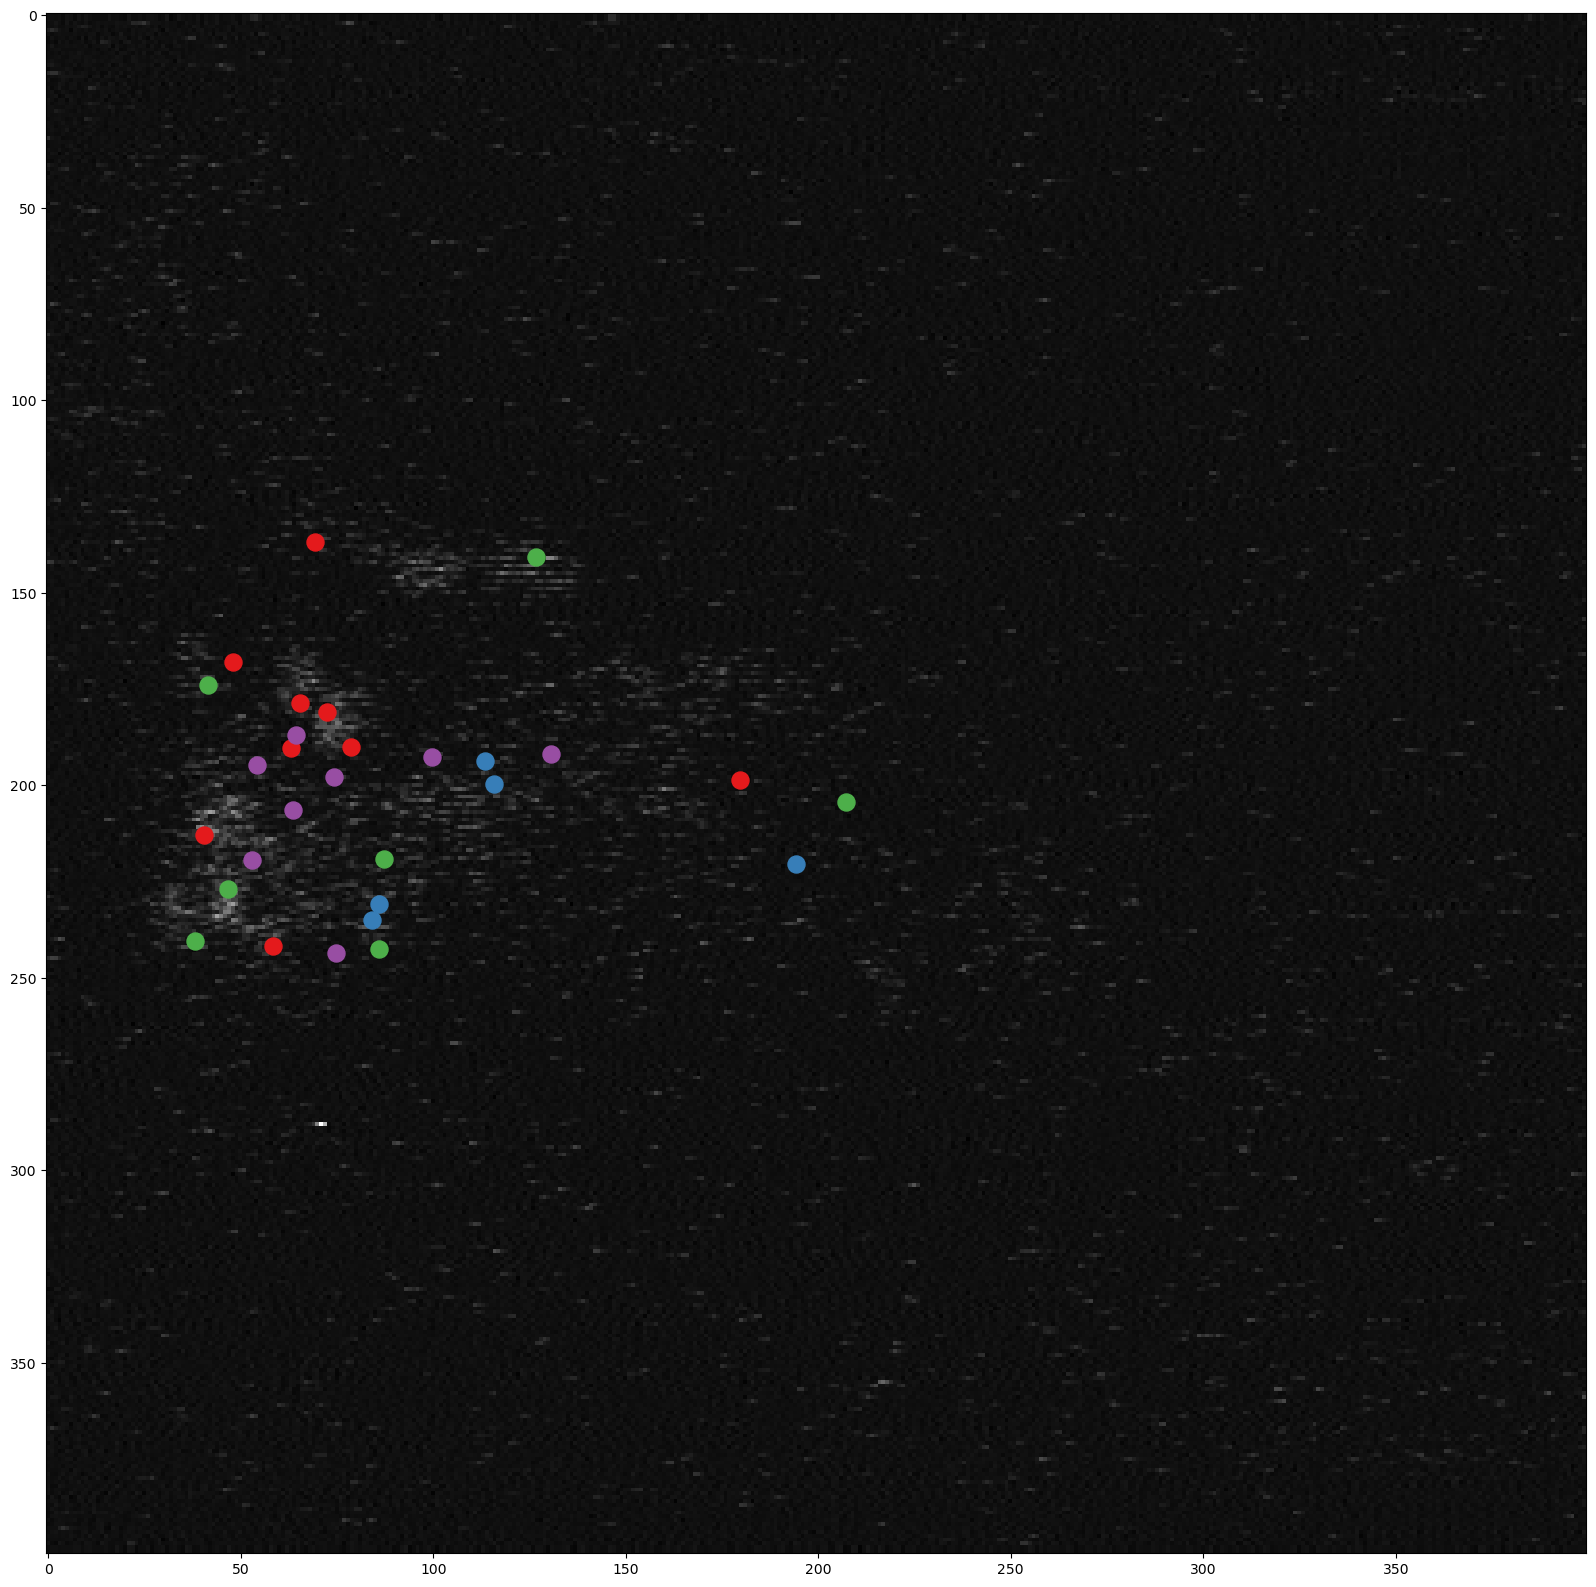

In [411]:
# Pick a plane and plot coms of all clusters

index = 1

img = mes_df.iloc[index].caiman.get_input_movie()[0]
# img = imread(os.path.join(fish.data_paths['anatomy'], 'downsampled_sum.tif'))

fig = plt.figure(figsize=(20, 20))
plt.imshow(img, cmap='gray')

cmap = get_cmap('Set1')  # type: matplotlib.colors.ListedColormap
cmap2 = get_cmap('Accent')  # type: matplotlib.colors.ListedColormap
colors = cmap.colors + cmap2.colors  # type: list

for i, (cluster, coms) in enumerate(sorted_com_clusters.items()):
    for com in coms:
        plt.scatter(com[0], com[1], s=150, color=colors[i])
        
plt.savefig(fish.data_paths['postgavage_path'].joinpath("clusters_spatial_all.pdf"), transparent=True)

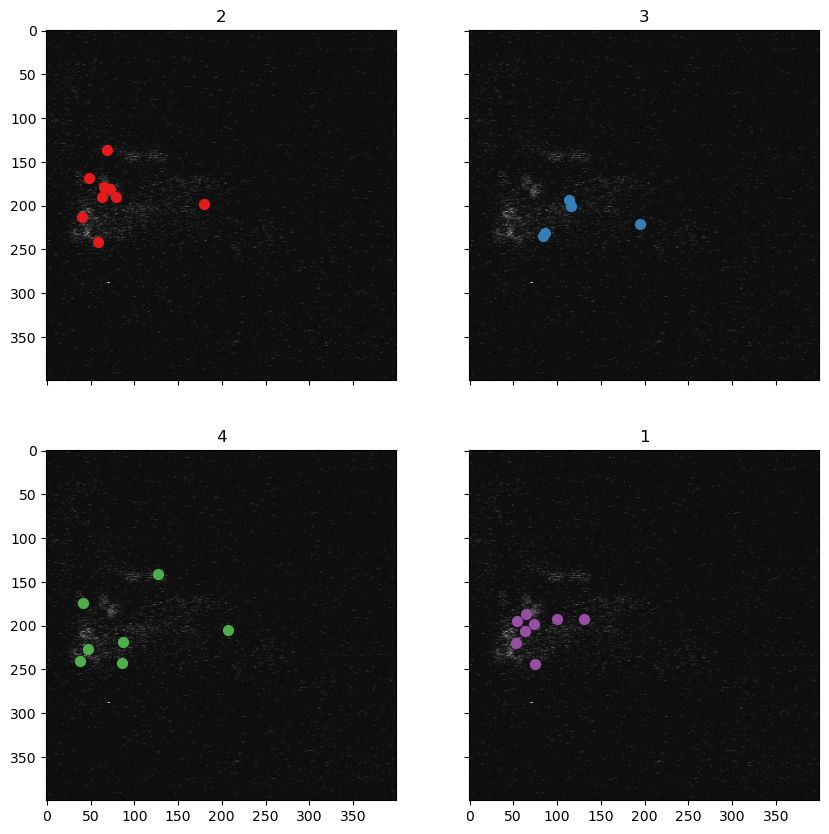

In [412]:
# Plot individual clusters

n_cols = 2
fig, axes = plt.subplots(ceil(len(sorted_com_clusters)/n_cols), n_cols, sharex=True, sharey=True, figsize=(10, ceil(len(sorted_com_clusters)/n_cols)*5))

cmap = get_cmap('Set1')  # type: matplotlib.colors.ListedColormap
cmap2 = get_cmap('Accent')  # type: matplotlib.colors.ListedColormap
colors = cmap.colors + cmap2.colors  # type: list

for i, (cluster, coms) in enumerate(sorted_com_clusters.items()):
    axes[int(i / n_cols), int(i % n_cols)].imshow(img, cmap='gray')
    axes[int(i / n_cols), int(i % n_cols)].title.set_text(cluster)
    for com in coms:
        axes[int(i / n_cols), int(i % n_cols)].scatter(com[0], com[1], s=50, color=colors[i])
        
plt.show()

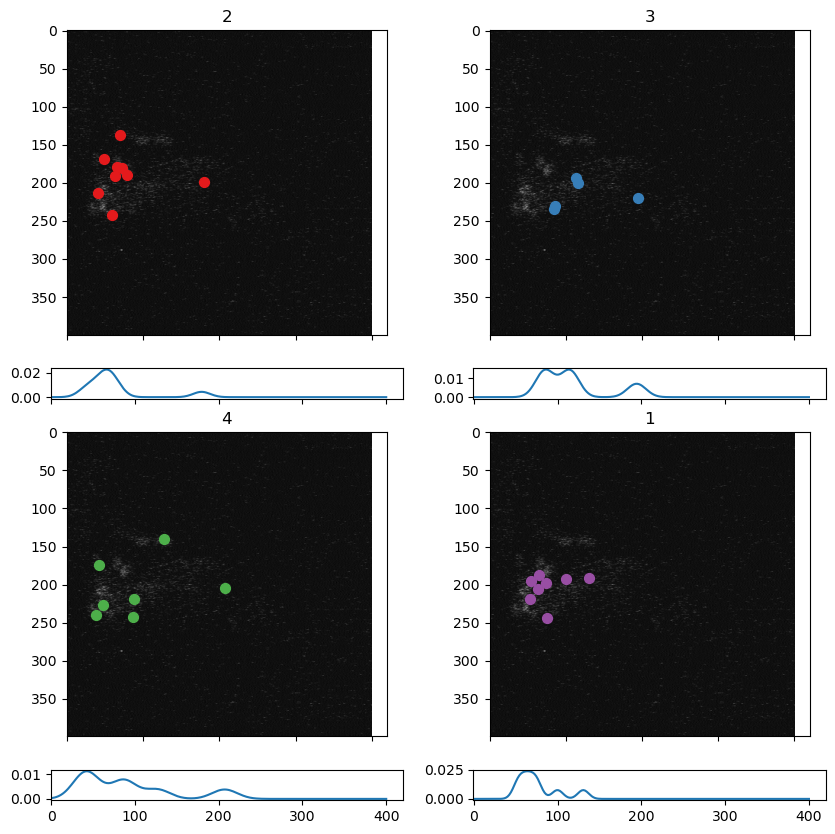

In [413]:
# Plot the x-distribution (lateralization) of neurons
from scipy.stats import gaussian_kde

n_cols = 2
n_rows = ceil(len(sorted_com_clusters)/n_cols)*2
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, figsize=(10, ceil(len(sorted_com_clusters)/n_cols)*5), 
                        height_ratios=[10, 1] * int(n_rows/2))

cmap = get_cmap('Set1')  # type: matplotlib.colors.ListedColormap
cmap2 = get_cmap('Accent')  # type: matplotlib.colors.ListedColormap
colors = cmap.colors + cmap2.colors  # type: list

for i, (cluster, coms) in enumerate(sorted_com_clusters.items()):
    if i % 2 == 0:
        img_row = i
        dist_row = i + 1
    else:
        img_row = i - 1
        dist_row = i
    
    axes[img_row, int(i % n_cols)].imshow(img, cmap='gray')
    axes[img_row, int(i % n_cols)].title.set_text(cluster)
    
    coords = []
    
    for com in coms:
        axes[img_row, int(i % n_cols)].scatter(com[0], com[1], s=50, color=colors[i])
        coords.append(com[0])
    
    if len(coords) > 1:
        density = gaussian_kde(coords)
        density.covariance_factor = lambda : .25
        density._compute_covariance()

        xs = np.linspace(0, img.shape[1], 200)

        axes[dist_row, int(i % n_cols)].plot(xs, density(xs))

plt.subplots_adjust(hspace=0.2)
plt.savefig(fish.data_paths['postgavage_path'].joinpath("clusters_spatial_individual.pdf"), transparent=True)

In [165]:
with os.scandir(fish.data_paths['anatomy']) as entries:
    for entry in entries:
        if entry.name.endswith('.tif') and entry.name.startswith('postgavage'):
            img_path = entry.path

In [171]:
from tifffile import imread
img = imread(img_path)
sum_img = np.fliplr(np.sum(img, axis=0))

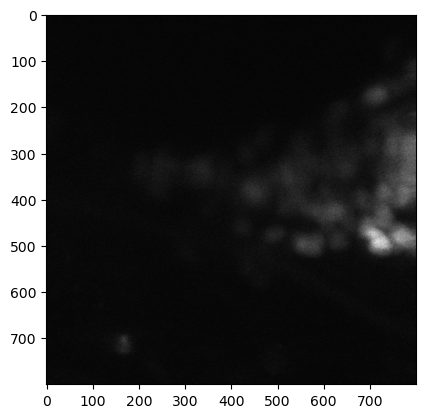

In [173]:
plt.imshow(sum_img, cmap='gray')

In [179]:
from skimage.measure import block_reduce
ds_img = block_reduce(sum_img, block_size=(3, 3), func=np.mean)

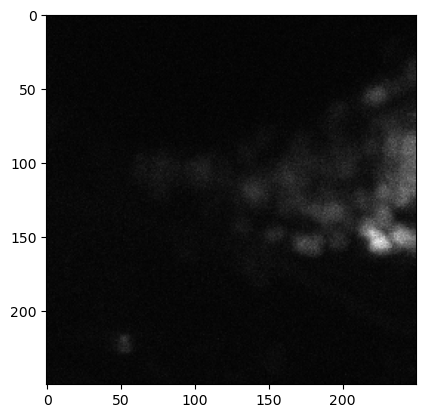

In [186]:
plt.imshow(a, cmap='gray')

In [181]:
from scipy import ndimage

def block_mean(ar, fact):
    assert isinstance(fact, int), type(fact)
    sx, sy = ar.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    regions = sy//fact * (X//fact) + Y//fact
    res = ndimage.mean(ar, labels=regions, index=np.arange(regions.max() + 1))
    res.shape = (sx//fact, sy//fact)
    return res

In [182]:
block_mean(sum_img, 3.2).shape

AssertionError: <class 'float'>

In [185]:
a = ndimage.interpolation.zoom(sum_img,0.3125) #decimate resolution

C:\Users\minel\AppData\Local\Temp\ipykernel_7288\3668896975.py:1: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  a = ndimage.interpolation.zoom(sum_img,0.3125) #decimate resolution


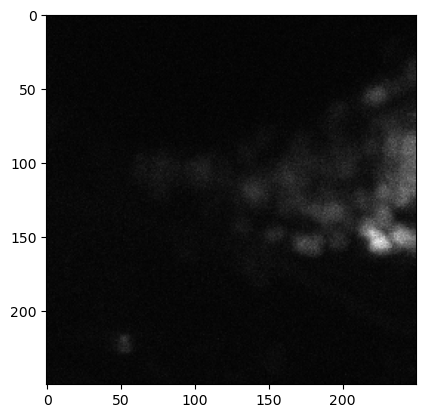

In [187]:
plt.imshow(a, cmap='gray')

In [188]:
from tifffile import imwrite

In [190]:
imwrite(os.path.join(fish.data_paths['anatomy'], 'downsampled_sum.tif'), a)